In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, timedelta
import statsmodels.api as sm

In [14]:
data = pd.read_csv("Stock Price Data.csv")
print(data.dtypes)
data.head(10)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


,Date,Open,High,Low,Close,Adj Close,Volume
0,31/12/2009,37.068000,37.131000,36.948751,36.998249,36.998249,4892780.4
1,4/01/2010,37.187250,37.394250,37.092751,37.234500,37.234500,7115420.4
2,5/01/2010,37.151249,37.275000,36.780001,37.162500,37.162500,7148180.4
3,6/01/2010,37.218750,37.275000,37.045501,37.133251,37.133251,4610180.4
4,7/01/2010,37.166999,37.263749,36.946500,37.059000,37.059000,4356020.4
5,8/01/2010,37.065750,37.128750,36.883500,37.083750,37.083750,4959380.4
6,11/01/2010,37.185000,37.207499,36.777750,36.971250,36.971250,5759300.4
7,12/01/2010,36.249001,36.260250,35.758500,35.765250,35.765250,18947900.4
8,13/01/2010,35.763000,35.877750,35.468250,35.812500,35.812500,18584660.4
9,14/01/2010,35.810250,36.089251,35.810250,35.967751,35.967751,9360380.4


In [16]:
data.Date = pd.to_datetime(data.Date, format="%d/%m/%Y")

In [18]:
data = data.set_index("Date")

In [19]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,37.068000,37.131000,36.948751,36.998249,36.998249,4892780.4
2010-01-04,37.187250,37.394250,37.092751,37.234500,37.234500,7115420.4
2010-01-05,37.151249,37.275000,36.780001,37.162500,37.162500,7148180.4
2010-01-06,37.218750,37.275000,37.045501,37.133251,37.133251,4610180.4
2010-01-07,37.166999,37.263749,36.946500,37.059000,37.059000,4356020.4


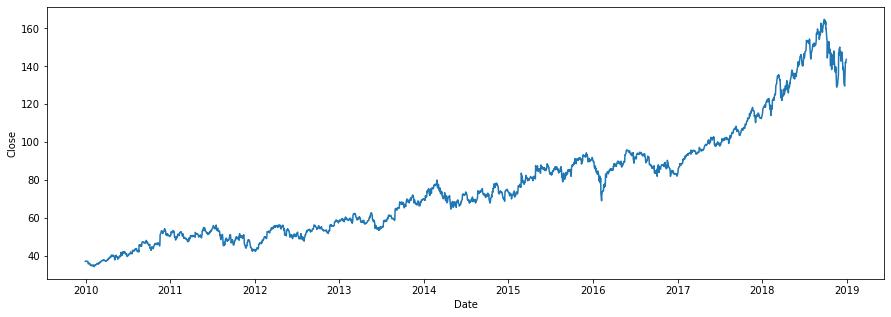

In [20]:
plt.figure(figsize=(15,5))
sns.lineplot(x=data.index, y=data["Close"])

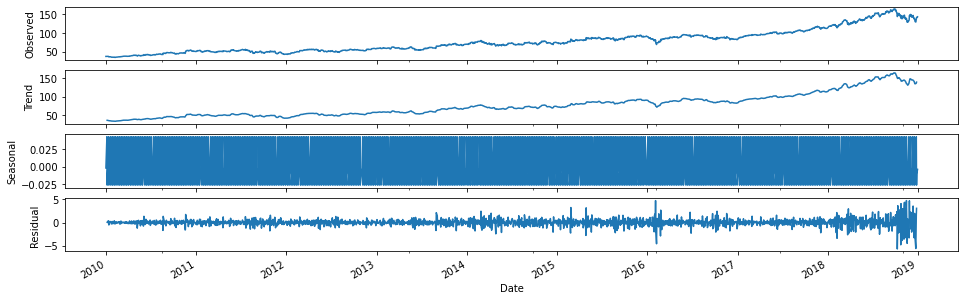

In [22]:
data_t = data.copy()
decomposition = sm.tsa.seasonal_decompose(data_t.Close, period=5, model="additive")

fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(16,5))
decomposition.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel("Observed")
decomposition.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel("Trend")
decomposition.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel("Seasonal")
decomposition.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel("Residual")
plt.show()

In [24]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

### Checking for Stationarity

In [46]:
adf = adfuller(data["Close"])
print("ADF Statistic: %f" %adf[0])
print("p-value: %f" %adf[1])
print("Critical Values:")
for key, value in adf[4].items():
    print("%s: %.3f" %(key, value))

ADF Statistic: 0.279036
p-value: 0.976362
Critical Values:
1%: -3.433
5%: -2.863
10%: -2.567


The time series is not stationary.

In [47]:
a_arima = auto_arima(data["Close"].values, start_p=0, start_q=0, test="adf", max_p=3, max_q=3, 
                     m=5, d=None, seasonal=True, start_P=0, D=0, trace=True,
                     error_action='ignore', suppress_warnings=True, stepwise=True)

print(a_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,1)[5] intercept   : AIC=7410.575, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=7409.507, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=7406.355, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=7405.897, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=7410.764, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=7405.030, Time=0.16 sec
 ARIMA(0,1,1)(1,0,0)[5] intercept   : AIC=7405.811, Time=0.30 sec
 ARIMA(0,1,1)(1,0,1)[5] intercept   : AIC=7404.978, Time=0.92 sec
 ARIMA(0,1,1)(2,0,1)[5] intercept   : AIC=7404.784, Time=1.53 sec
 ARIMA(0,1,1)(2,0,0)[5] intercept   : AIC=7404.423, Time=0.58 sec
 ARIMA(0,1,0)(2,0,0)[5] intercept   : AIC=7409.123, Time=0.45 sec
 ARIMA(1,1,1)(2,0,0)[5] intercept   : AIC=7394.836, Time=1.97 sec
 ARIMA(1,1,1)(1,0,0)[5] intercept   : AIC=7398.267, Time=1.37 sec
 ARIMA(1,1,1)(2,0,1)[5] intercept   : AIC=7395.232, Time=3.22 sec
 ARIMA(1,1,1)(1,0,1)[5] intercept

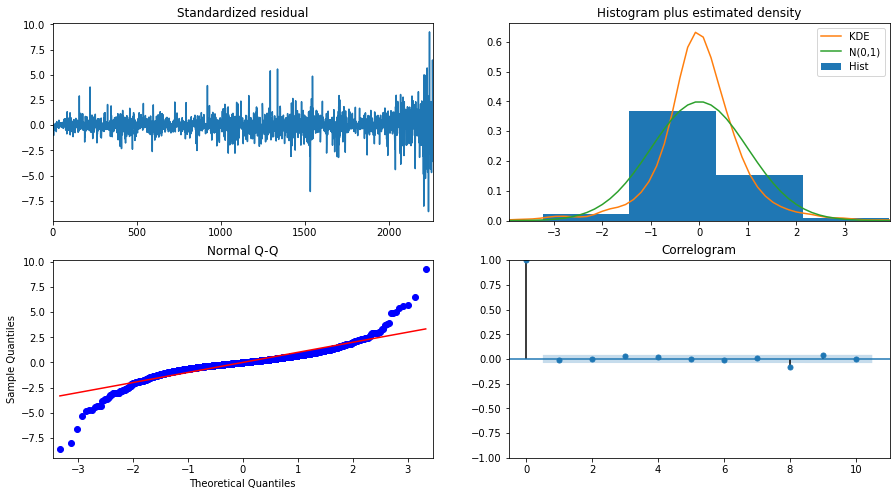

In [48]:
a_arima.plot_diagnostics(figsize=(15,8))
plt.show()

### Model Fitting

In [49]:
model = SARIMAX(data["Close"].values, order=(1,1,1), seasonal_order=(2,0,0,5), trend="ct")
model_fit = model.fit()
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 2265
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 5)   Log Likelihood               -3695.575
Date:                            Wed, 07 Oct 2020   AIC                           7405.150
Time:                                    01:51:48   BIC                           7445.224
Sample:                                         0   HQIC                          7419.772
                                           - 2265                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0123      0.035      0.353      0.724      -0.056       0.081
drift       6.612e-06   2.07e-05   

In [33]:
sample_sub = pd.read_csv("Sample Submission.csv")

In [77]:
forecast = (sample_sub.reset_index()
            .merge(pd.Series(model_fit.forecast(355), name="Forecast")
                   .reset_index(), on="index")[["Date", "Forecast"]].rename({"Forecast": "Close"}, axis=1))

In [78]:
forecast

,Date,Close
0,2/01/2019,143.324023
1,3/01/2019,143.172871
2,4/01/2019,143.061742
3,7/01/2019,142.974248
4,8/01/2019,142.798323
...,...,...
350,22/05/2020,162.609808
351,26/05/2020,162.667915
352,27/05/2020,162.726035
353,28/05/2020,162.784168


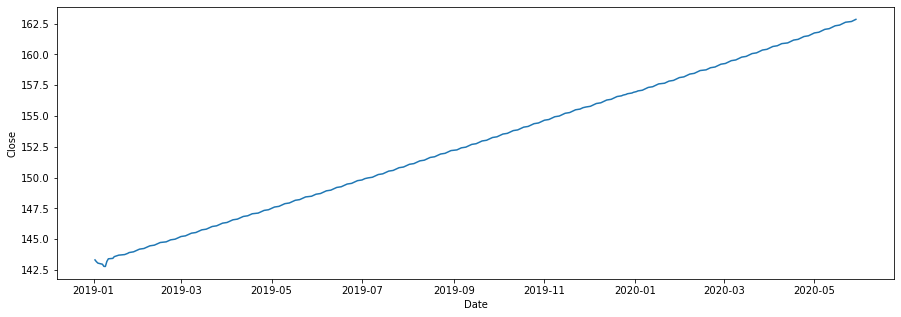

In [79]:
plt.figure(figsize=(15,5))
sns.lineplot(x=pd.to_datetime(forecast.Date, format="%d/%m/%Y"), y=forecast["Close"])

In [80]:
forecast.to_csv("submission.csv", index=False)